# QComponent - Interdigitated transmon qubit

This demo notebook goes over how to use the interdigitated transmon component, similar to those describedin Gambetta et. al., IEEE Trans. on Superconductivity Vol. 27, No. 1 (2007). 

#### Preparation
First, let's import the key libraries for qiskit metal: 

In [1]:
import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict #, open_docs

(temporary patch) the creation of the cpw geomeptries from the interdigitated transmon pins, appear to cause a short-edge error rooted into the precision of the point alignment. For the timebeing you can run the following cell to suppress said violation.

In [2]:
import qiskit_metal.toolbox_metal.math_and_overrides as mov
mov.DECIMAL_PRECISION=7

#### Create the design
Next, let's fire up the GUI: 

In [3]:
design = designs.DesignPlanar()
gui = MetalGUI(design)

The name of the component located in the qlibrary is "Transmon_Interdigitated" and we can take a look at the various input options:

In [4]:
from qiskit_metal.qlibrary.qubits.Transmon_Interdigitated import TransmonInterdigitated
TransmonInterdigitated.get_template_options(design)

{'pad_width': '1000um',
 'pad_height': '300um',
 'finger_width': '50um',
 'finger_height': '100um',
 'finger_space': '50um',
 'pad_pos_x': '0um',
 'pad_pos_y': '0um',
 'comb_width': '50um',
 'comb_space_vert': '50um',
 'comb_space_hor': '50um',
 'jj_width': '20um',
 'cc_space': '50um',
 'cc_width': '100um',
 'cc_height': '100um',
 'cc_topleft_space': '50um',
 'cc_topleft_width': '100um',
 'cc_topleft_height': '100um',
 'cc_topright_space': '50um',
 'cc_topright_width': '100um',
 'cc_topright_height': '100um',
 'rotation_top_pad': '180',
 'inductor_width': '20um'}

Now let's create three transmons, each centered at a specific (x,y) coordinate: 

In [5]:
from qiskit_metal.qlibrary.qubits.Transmon_Interdigitated import TransmonInterdigitated
design.overwrite_enabled = True
q1 = TransmonInterdigitated(design, 'qubit1', options=dict(pos_x='-2.0mm',orientation='-90'))
q2 = TransmonInterdigitated(design, 'qubit2', options=dict(pos_x='2.0mm', orientation='90'))
q3 = TransmonInterdigitated(design, 'qubit3', options=dict(pos_y='3.0mm', orientation='180'))
gui.rebuild()
gui.autoscale()

To check that the qpin connections are functioning correctly, we'll connect these transmons with CPWs. Let's first connect qpin2 of "qubit1" to qpin3 of "qubit3". We can do this using the RouteMeander functionality. 

In [6]:
from qiskit_metal.qlibrary.tlines.meandered import RouteMeander

In [7]:
ops=dict(fillet='90um')

In [8]:
options = Dict(
    total_length= '5mm',
    pin_inputs=Dict(
        start_pin=Dict(
            component= 'qubit1',
            pin= 'bus1'),
        end_pin=Dict(
            component= 'qubit3',
            pin= 'bus2')),
    lead=Dict(
        start_straight='0.5mm',
        end_straight='0.0mm'),
    meander=Dict(
       asymmetry='0mm'),
    **ops
)

# Below I am creating a CPW without assigning its name.
#  Therefore running this cell twice will create two CPW's instead of overwriting the previous one
#  To prevent that we add the cpw.delete() statement.
#  The try-except wrapping is needed to suppress errors during the first run of this cell
try:
    cpw.delete()
except NameError: pass

cpw1 = RouteMeander(design, options=options)
gui.rebuild()
gui.autoscale()

Now let's connect qubit 2 to qubit 3:

In [9]:
options = Dict(
    total_length= '5mm',
    pin_inputs=Dict(
        start_pin=Dict(
            component= 'qubit2',
            pin= 'bus2'),
        end_pin=Dict(
            component= 'qubit3',
            pin= 'bus1')),
    lead=Dict(
        start_straight='0.5mm',
        end_straight='0.0mm'),
    meander=Dict(
       asymmetry='0mm'),
    **ops
)

#try:
#    cpw.delete()
#except NameError: pass

cpw2 = RouteMeander(design, options=options)
gui.rebuild()
gui.autoscale()

And finally, let's connect pin3 of qubit1 to pin2 of qubit 2: 

In [10]:
options = Dict(
    total_length= '8mm',
    pin_inputs=Dict(
        start_pin=Dict(
            component= 'qubit1',
            pin= 'bus2'),
        end_pin=Dict(
            component= 'qubit2',
            pin= 'bus1')),
    lead=Dict(
        start_straight='0.5mm',
        end_straight='0.5mm'),
    meander=Dict(
       asymmetry='0mm'),
    **ops
)

#try:
#    cpw.delete()
#except NameError: pass

cpw2 = RouteMeander(design, options=options)
gui.rebuild()
gui.autoscale()

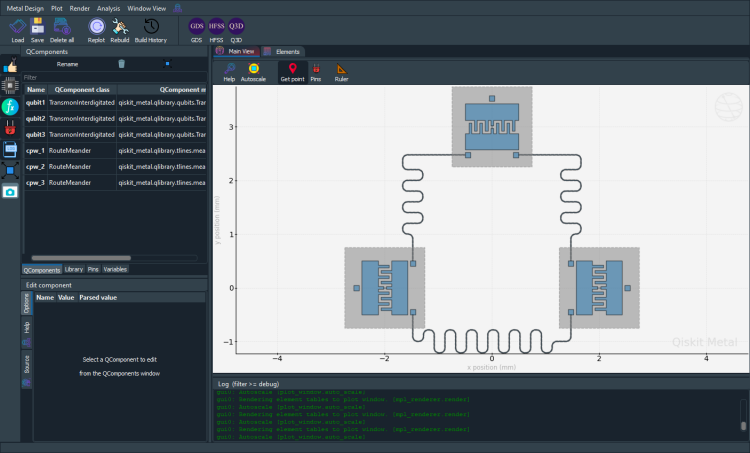

In [11]:
gui.screenshot()